<a href="https://colab.research.google.com/github/bhavesh932003/Stock-Price-prediction/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [32]:
start ='2012-1-1'
end='2024-7-1'
stock='RELIANCE.NS'
data = yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [33]:
data.reset_index(inplace=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-02,318.553528,324.473816,314.141876,323.010895,294.166199,9404053
1,2012-01-03,325.616730,332.314240,324.748108,331.285614,301.701935,10244609
2,2012-01-04,332.542816,334.165741,326.119629,327.399689,298.163055,9270951
3,2012-01-05,326.873932,331.422760,317.319153,319.787872,291.231018,14479600
4,2012-01-06,318.667816,330.988434,318.484955,328.039734,298.745941,10287605
...,...,...,...,...,...,...,...
3073,2024-06-24,2891.050049,2899.000000,2875.000000,2882.949951,2882.949951,4439193
3074,2024-06-25,2886.000000,2911.850098,2882.000000,2908.300049,2908.300049,3522693
3075,2024-06-26,2892.100098,3037.949951,2890.250000,3028.050049,3028.050049,11007441
3076,2024-06-27,3027.500000,3075.000000,3012.000000,3061.100098,3061.100098,14191515


In [34]:
ma_100_days=data.Close.rolling(100).mean()

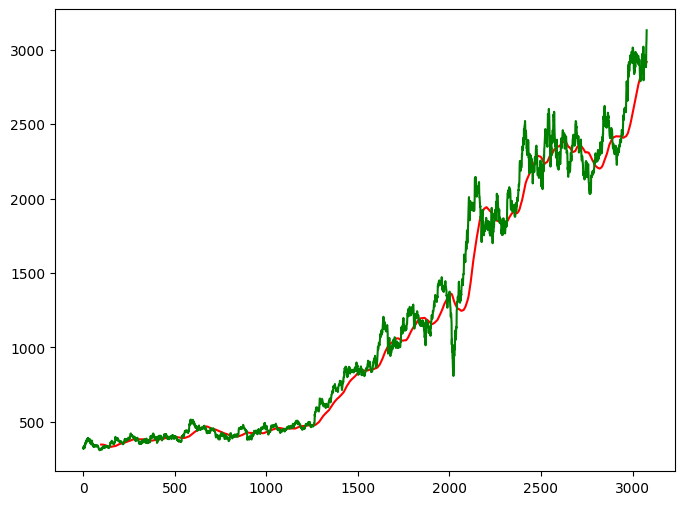

In [35]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [36]:
ma_200_days=data.Close.rolling(200).mean()

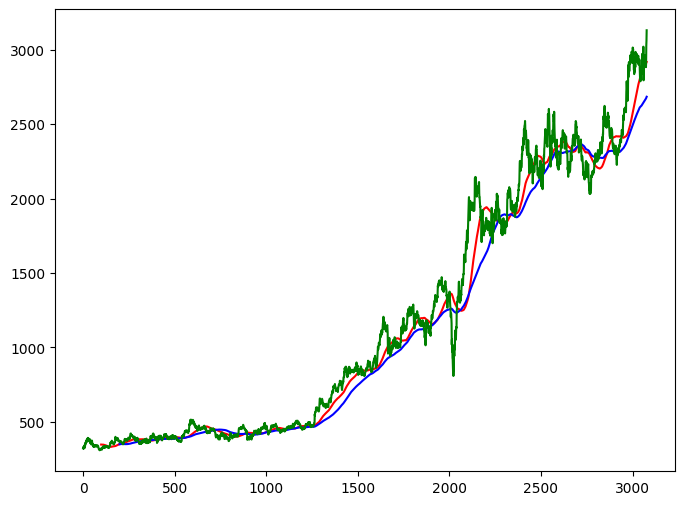

In [37]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [38]:
data.dropna(inplace=True)

In [39]:
data_train=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test= pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [40]:
data_train.shape[0]

2462

In [41]:
data_test.shape[0]

616

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [43]:
data_train_scale = scaler.fit_transform(data_train)

In [44]:
x=[]
y=[]
for i in range(100, data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])

In [45]:
x,y = np.array(x),np.array(y)

In [46]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [47]:
model = Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

In [48]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [49]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
74/74 [==============================] - 27s 286ms/step - loss: 0.0276
Epoch 2/50
74/74 [==============================] - 19s 262ms/step - loss: 0.0062
Epoch 3/50
74/74 [==============================] - 21s 284ms/step - loss: 0.0049
Epoch 4/50
74/74 [==============================] - 19s 259ms/step - loss: 0.0047
Epoch 5/50
74/74 [==============================] - 21s 280ms/step - loss: 0.0040
Epoch 6/50
74/74 [==============================] - 19s 262ms/step - loss: 0.0043
Epoch 7/50
74/74 [==============================] - 21s 282ms/step - loss: 0.0042
Epoch 8/50
74/74 [==============================] - 19s 263ms/step - loss: 0.0039
Epoch 9/50
74/74 [==============================] - 25s 342ms/step - loss: 0.0042
Epoch 10/50
74/74 [==============================] - 20s 273ms/step - loss: 0.0035
Epoch 11/50
74/74 [==============================] - 20s 269ms/step - loss: 0.0039
Epoch 12/50
74/74 [==============================] - 20s 273ms/step - loss: 0.0037
Epoch 13/50
7

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [51]:
pas_100_days = data_train.tail(100)

In [52]:
data_test=pd.concat([pas_100_days,data_test],ignore_index=True)

In [53]:
data_test_scale=scaler.fit_transform(data_test)

In [54]:
x=[]
y=[]
for i in range(100, data_test_scale.shape[0]):
  x.append(data_test_scale[i-100:i])
  y.append(data_test_scale[i,0])
x=np.array(x)
y=np.array(y)

In [55]:
y_predict = model.predict(x)

20/20 [==============================] - 3s 131ms/step


In [56]:
scale = 1/scaler.scale_

In [57]:
y_predict=y_predict*scale

In [58]:
y=y*scale

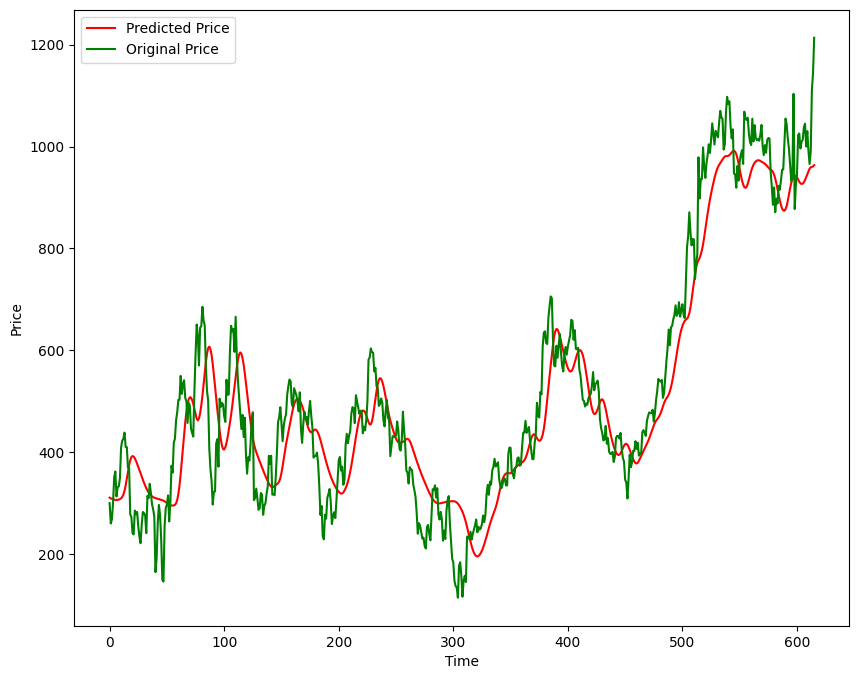

In [59]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label='Predicted Price')
plt.plot(y,'g',label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [60]:
model.save('Stock Prediction Model.keras')